In [48]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sns  
import plotly.express as px  
import os  
import time  
import random 
import re 
from datetime import datetime

In [2]:
import pandas as pd

df_customer = pd.read_csv('customer_dim.csv', encoding='utf-8', encoding_errors='ignore')
df_fact = pd.read_csv('fact_table.csv', encoding='utf-8', encoding_errors='ignore')
df_item = pd.read_csv('item_dim.csv', encoding='utf-8', encoding_errors='ignore')
df_store = pd.read_csv('store_dim.csv', encoding='utf-8', encoding_errors='ignore')
df_time = pd.read_csv('time_dim.csv', encoding='utf-8', encoding_errors='ignore')
df_trans = pd.read_csv('Trans_dim.csv', encoding='utf-8', encoding_errors='ignore')


# **Customer**

In [3]:
df_customer.head()

,coustomer_key,name,contact_no,nid
0,C000001,sumit,8801920345851,7505075708899
1,C000002,tammanne,8801817069329,1977731324842
2,C000003,kailash kumar,8801663795774,3769494056318
3,C000004,bhagwati prasad,8801533627961,9378834712725
4,C000005,ajay,8801943715786,3540815556323


In [4]:
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9191 entries, 0 to 9190
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   coustomer_key  9191 non-null   object
 1   name           9164 non-null   object
 2   contact_no     9191 non-null   int64 
 3   nid            9191 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 287.3+ KB


In [5]:
if df_customer['coustomer_key'].duplicated().any():
    print("Duplicate customer keys found!")
else :
    print("No Duplicated Found")

No Duplicated Found


In [6]:
df_customer.name.isnull().sum()

27

In [7]:
df_customer['name'] = df_customer['name'].fillna('Anonymous Customer')

In [8]:
df_customer.name.isnull().sum()

0

In [9]:
def manipulate_strings(column):
    column_cleaned = re.sub(r'[^a-zA-Z\s]', '', column)
    case = column_cleaned.title()
    return case

In [10]:
df_customer['name'] = df_customer['name'].apply(manipulate_strings)
df_customer['name']

0                 Sumit
1              Tammanne
2         Kailash Kumar
3       Bhagwati Prasad
4                  Ajay
             ...       
9186          Smt Radha
9187       Tulsi Sharma
9188          Madhubala
9189         Pintu Devi
9190              Roopa
Name: name, Length: 9191, dtype: object

In [11]:
df_customer['contact_no'] = df_customer['contact_no'].astype(str)
df_customer['nid'] = df_customer['nid'].astype(str)

---------------------

# **Fact**

In [12]:
df_fact.head()

,payment_key,coustomer_key,time_key,item_key,store_key,quantity,unit,unit_price,total_price
0,P026,C004510,T049189,I00177,S00307,1,ct,35.0,35.0
1,P022,C008967,T041209,I00248,S00595,1,rolls,26.0,26.0
2,P030,C007261,T03633,I00195,S00496,8,ct,12.5,100.0
3,P032,C007048,T084631,I00131,S0086,8,ct,14.0,112.0
4,P014,C006430,T071276,I00050,S00488,8,cans,8.0,64.0


In [13]:
df_fact.describe()

,quantity,unit_price,total_price
count,1000000.000000,1000000.000000,1000000.000000
mean,6.000185,17.561602,105.401436
std,3.161932,8.637097,80.829301
min,1.000000,6.000000,6.000000
25%,3.000000,13.000000,47.250000
50%,6.000000,16.000000,90.000000
75%,9.000000,20.000000,144.000000
max,11.000000,55.000000,605.000000


In [14]:
df_fact.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   payment_key    1000000 non-null  object 
 1   coustomer_key  1000000 non-null  object 
 2   time_key       1000000 non-null  object 
 3   item_key       1000000 non-null  object 
 4   store_key      1000000 non-null  object 
 5   quantity       1000000 non-null  int64  
 6   unit           996277 non-null   object 
 7   unit_price     1000000 non-null  float64
 8   total_price    1000000 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 68.7+ MB


In [15]:
df_fact.sample(5)

,payment_key,coustomer_key,time_key,item_key,store_key,quantity,unit,unit_price,total_price
225082,P005,C007372,T011801,I00040,S00322,7,bottles,22.0,154.0
995308,P029,C003937,T033449,I00147,S00388,5,ct,15.0,75.0
646845,P022,C005341,T092087,I00253,S00101,6,bags,21.0,126.0
224380,P008,C000369,T081866,I00031,S00596,4,cans,16.0,64.0
811633,P027,C007165,T029563,I00239,S00275,6,pk,14.0,84.0


In [16]:
df_fact['item_key'].value_counts()

item_key
I00015    3952
I00203    3939
I00082    3923
I00257    3920
I00230    3913
          ... 
I00168    3666
I00141    3665
I00068    3665
I00173    3659
I00051    3625
Name: count, Length: 264, dtype: int64

In [17]:
df_fact['unit'].value_counts()

unit
ct          355938
cans        215602
bottles     140073
oz           71956
bags         49739
pk           37918
ct.          30474
bars         18950
pack         18876
Bags         11298
tubs         11271
rolls         7624
Ct            7575
cartons       3893
botlltes      3796
lb            3795
tins          3772
oz.           3727
Name: count, dtype: int64

In [18]:
df_fact.groupby('store_key')['total_price'].sum().sort_values()

store_key
S00182    130082.75
S00566    131603.50
S00550    131824.00
S00100    132461.50
S00310    133580.50
            ...    
S0080     157377.50
S0039     157483.00
S00328    157692.00
S00601    158027.50
S0010     159409.00
Name: total_price, Length: 726, dtype: float64

In [19]:
df_fact[df_fact.isnull().any(axis=1)]

,payment_key,coustomer_key,time_key,item_key,store_key,quantity,unit,unit_price,total_price
413,P030,C001653,T053668,I00158,S00327,1,NaN,17.0,17.0
478,P013,C008861,T036513,I00158,S00280,9,NaN,17.0,153.0
1500,P007,C008864,T052262,I00158,S00308,7,NaN,17.0,119.0
2033,P037,C002870,T050819,I00158,S00506,7,NaN,17.0,119.0
2053,P020,C003666,T094595,I00158,S0077,11,NaN,17.0,187.0
...,...,...,...,...,...,...,...,...,...
998455,P016,C007003,T04678,I00158,S00522,1,NaN,17.0,17.0
998754,P039,C004215,T022792,I00158,S0092,9,NaN,17.0,153.0
998757,P027,C000309,T07076,I00158,S00550,9,NaN,17.0,153.0
999136,P033,C008559,T070336,I00158,S00553,11,NaN,17.0,187.0


In [20]:
df_fact['unit'] = df_fact['unit'].fillna("pack")


In [21]:
df_fact[df_fact['item_key']=='I00158']

,payment_key,coustomer_key,time_key,item_key,store_key,quantity,unit,unit_price,total_price
413,P030,C001653,T053668,I00158,S00327,1,pack,17.0,17.0
478,P013,C008861,T036513,I00158,S00280,9,pack,17.0,153.0
1500,P007,C008864,T052262,I00158,S00308,7,pack,17.0,119.0
2033,P037,C002870,T050819,I00158,S00506,7,pack,17.0,119.0
2053,P020,C003666,T094595,I00158,S0077,11,pack,17.0,187.0
...,...,...,...,...,...,...,...,...,...
998455,P016,C007003,T04678,I00158,S00522,1,pack,17.0,17.0
998754,P039,C004215,T022792,I00158,S0092,9,pack,17.0,153.0
998757,P027,C000309,T07076,I00158,S00550,9,pack,17.0,153.0
999136,P033,C008559,T070336,I00158,S00553,11,pack,17.0,187.0


In [22]:
df_fact.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   payment_key    1000000 non-null  object 
 1   coustomer_key  1000000 non-null  object 
 2   time_key       1000000 non-null  object 
 3   item_key       1000000 non-null  object 
 4   store_key      1000000 non-null  object 
 5   quantity       1000000 non-null  int64  
 6   unit           1000000 non-null  object 
 7   unit_price     1000000 non-null  float64
 8   total_price    1000000 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 68.7+ MB


---------------------------

# **Items**

In [23]:
df_item.sample(10)

,item_key,item_name,desc,unit_price,man_country,supplier,unit
15,I00016,Dr. Pepper - 12 oz cans,a. Beverage - Soda,16.25,China,"CHERRY GROUP CO.,LTD",cans
55,I00056,Muscle Milk Protein Shake Choc. 11oz,Beverage - Energy/Protein,24.00,Netherlands,Bolsius Boxmeer,bottles
195,I00196,Fiber One 90 Calorie Fudge Brownies,Food - Healthy,16.00,poland,CHROMADURLIN S.A.S,ct
27,I00028,Sprite Zero - 12 pack,a. Beverage - Soda,6.75,poland,CHROMADURLIN S.A.S,cans
234,I00235,Zoo Animal Cookies/Crackers,Food - Sweets,14.00,India,Indo Count Industries Ltd,ct
138,I00139,Foam Coffee Cups - 16 ounce,Dishware - Cups Hot,24.00,Germany,Friedola 1888 GmbH,ct
214,I00215,Planters Nut Variety Packs,Food - Nuts,14.00,poland,CHROMADURLIN S.A.S,ct.
222,I00223,Lance Variety Cracker Packs,Food - Snacks,13.50,Bangladesh,DENIMACH LTD,ct
24,I00025,Seven Up - 12 oz cans,a. Beverage - Soda,11.50,China,"CHERRY GROUP CO.,LTD",cans
151,I00152,Cheez It Original Crackers 1.5oz,Food - Chips,15.00,poland,CHROMADURLIN S.A.S,bags


In [24]:
df_item.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   item_key     264 non-null    object 
 1   item_name    264 non-null    object 
 2   desc         264 non-null    object 
 3   unit_price   264 non-null    float64
 4   man_country  264 non-null    object 
 5   supplier     264 non-null    object 
 6   unit         263 non-null    object 
dtypes: float64(1), object(6)
memory usage: 14.6+ KB


In [25]:
df_item[df_item.isnull().any(axis=1)]

,item_key,item_name,desc,unit_price,man_country,supplier,unit
157,I00158,Frito Bold Flavors Variety,Food - Chips,17.0,Lithuania,BIGSO AB,NaN


In [26]:
df_item['unit'] = df_item['unit'].fillna("pack")


In [27]:
df_item['man_country'].unique()

array(['Netherlands', 'poland', 'Bangladesh', 'Finland', 'Lithuania',
       'India', 'Germany', 'China', 'United States', 'Cambodia'],
      dtype=object)

In [28]:
df_item_sorted = df_item.sort_values(by='unit_price', ascending=False)


In [29]:
df_item_sorted.head()

,item_key,item_name,desc,unit_price,man_country,supplier,unit
60,I00061,Red Bull 12oz,Beverage - Energy/Protein,55.0,United States,MAESA SAS,cans
114,I00115,K Cups Daily Chef Columbian Supremo,Coffee K-Cups,53.0,India,Indo Count Industries Ltd,ct
118,I00119,K Cups Original Donut Shop Med. Roast,Coffee K-Cups,53.0,India,Indo Count Industries Ltd,ct
115,I00116,K Cups Dunkin Donuts Medium Roast,Coffee K-Cups,48.0,United States,MAESA SAS,ct
116,I00117,K Cups Folgers Lively Columbian,Coffee K-Cups,46.0,Cambodia,NINGBO SEDUNO IMP & EXP CO.LTD,ct


In [30]:
df_count = df_item['man_country'].value_counts()
df_count

man_country
Bangladesh       34
India            32
Germany          31
poland           28
Finland          27
Netherlands      26
Lithuania        26
Cambodia         24
United States    20
China            16
Name: count, dtype: int64

-----

# **Stores**

In [31]:
df_store.head()

,store_key,division,district,upazila
0,S0001,SYLHET,HABIGANJ,AJMIRIGANJ
1,S0002,SYLHET,HABIGANJ,BAHUBAL
2,S0003,SYLHET,HABIGANJ,BANIACHONG
3,S0004,SYLHET,HABIGANJ,CHUNARUGHAT
4,S0005,SYLHET,HABIGANJ,HABIGANJ SADAR


In [32]:
df_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 726 entries, 0 to 725
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   store_key  726 non-null    object
 1   division   726 non-null    object
 2   district   726 non-null    object
 3   upazila    726 non-null    object
dtypes: object(4)
memory usage: 22.8+ KB


In [33]:
df_store['store_key'] = df_store['store_key'].astype("str")

-----------------------

# **Time**

In [34]:
df_time.head()

,time_key,date,hour,day,week,month,quarter,year
0,T00001,20-05-2017 14:56,14,20,3rd Week,5,Q2,2017
1,T00002,30-01-2015 22:14,22,30,4th Week,1,Q1,2015
2,T00003,14-03-2020 02:34,2,14,2nd Week,3,Q1,2020
3,T00004,27-04-2018 12:19,12,27,4th Week,4,Q2,2018
4,T00005,14-04-2018 10:43,10,14,2nd Week,4,Q2,2018


In [35]:
df_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   time_key  99999 non-null  object
 1   date      99999 non-null  object
 2   hour      99999 non-null  int64 
 3   day       99999 non-null  int64 
 4   week      99999 non-null  object
 5   month     99999 non-null  int64 
 6   quarter   99999 non-null  object
 7   year      99999 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 6.1+ MB


In [36]:
df_time['date'] = pd.to_datetime(df_time['date'], format='%d-%m-%Y %H:%M')
df_time['date']

0       2017-05-20 14:56:00
1       2015-01-30 22:14:00
2       2020-03-14 02:34:00
3       2018-04-27 12:19:00
4       2018-04-14 10:43:00
                ...        
99994   2015-01-04 17:22:00
99995   2015-01-17 21:09:00
99996   2020-01-23 14:42:00
99997   2015-10-31 13:52:00
99998   2017-06-08 08:59:00
Name: date, Length: 99999, dtype: datetime64[ns]

In [37]:
df_time['time'] = df_time['date'].dt.time
df_time['date'] = df_time['date'].dt.date
df_time.head()

,time_key,date,hour,day,week,month,quarter,year,time
0,T00001,2017-05-20,14,20,3rd Week,5,Q2,2017,14:56:00
1,T00002,2015-01-30,22,30,4th Week,1,Q1,2015,22:14:00
2,T00003,2020-03-14,2,14,2nd Week,3,Q1,2020,02:34:00
3,T00004,2018-04-27,12,27,4th Week,4,Q2,2018,12:19:00
4,T00005,2018-04-14,10,14,2nd Week,4,Q2,2018,10:43:00


In [38]:
df_time['week'] = df_time['week'].replace({
    "3rd Week": 3,
    "4th Week": 4,
    "2nd Week": 2,
    "1st Week": 1
}).astype(int)


C:\Users\workstation\AppData\Local\Temp\ipykernel_12400\1763343120.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_time['week'] = df_time['week'].replace({


In [39]:
df_time['quarter'] = df_time['quarter'].replace({
    "Q1": 1,
    "Q2": 2,
    "Q3": 3,
    "Q4": 4
}).astype(int)


C:\Users\workstation\AppData\Local\Temp\ipykernel_12400\3738908347.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_time['quarter'] = df_time['quarter'].replace({


In [40]:
df_time['date'] = pd.to_datetime(df_time['date'])
df_time['quarter'] = df_time['quarter'].astype('category') 
df_time['time'] = pd.to_datetime(df_time['time'], format='%H:%M:%S').dt.time

In [41]:
df_time.dtypes

time_key            object
date        datetime64[ns]
hour                 int64
day                  int64
week                 int32
month                int64
quarter           category
year                 int64
time                object
dtype: object

In [42]:
df_time.sample(5)

,time_key,date,hour,day,week,month,quarter,year,time
67443,T067444,2019-01-12,19,12,2,1,1,2019,19:08:00
39838,T039839,2014-05-02,16,2,1,5,2,2014,16:04:00
31384,T031385,2015-07-29,1,29,4,7,3,2015,01:44:00
53359,T053360,2019-09-02,15,2,1,9,3,2019,15:44:00
89735,T089736,2014-01-25,11,25,4,1,1,2014,11:47:00


-----------------------------------------

# **Transaction**

In [43]:
df_trans.head()

,payment_key,trans_type,bank_name
0,P001,cash,NaN
1,P002,card,AB Bank Limited
2,P003,card,Bangladesh Commerce Bank Limited
3,P004,card,Bank Asia Limited
4,P005,card,BRAC Bank Limited


In [44]:
df_trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   payment_key  39 non-null     object
 1   trans_type   39 non-null     object
 2   bank_name    38 non-null     object
dtypes: object(3)
memory usage: 1.0+ KB


In [45]:
df_trans['bank_name'] = df_trans['bank_name'].fillna('Unknown')

------------------------------------------------

# Segmentation 

## 📊 **RFM Analysis – Structured Summary**

---

### 🧩 **1. Data Preparation & Merging**
- The transactional data (`df_fact`) is merged with the time dimension data (`df_time`) using a **common key** (`time_key`).
- This ensures each transaction is associated with its corresponding **date and time details**, enabling accurate **time-based analysis**.

---

### 🕒 **2. Recency Calculation (R)**  
- **Definition**: Measures how recently a customer made a purchase.

#### 🔧 *Method*:
- For each customer (`customer_key`), identify the **latest purchase date**.
- Calculate the number of days between the **current date** and the **last purchase date**.

#### 📌 *Interpretation*:
- **Low Recency** (e.g., `10 days`): ➝ Recent activity  
- **High Recency** (e.g., `120 days`): ➝ Long inactivity  

---

### 🔁 **3. Frequency Calculation (F)**  
- **Definition**: Measures how often a customer makes purchases.

#### 🔧 *Method*:
- Count the total number of transactions (`payment_key`) per customer.

#### 📌 *Interpretation*:
- **High Frequency** (e.g., `15 purchases`): ➝ Loyal customer  
- **Low Frequency** (e.g., `1 purchase`): ➝ One-time/new customer  

---

### 💰 **4. Monetary Value Calculation (M)**  
- **Definition**: Measures the total spending of a customer.

#### 🔧 *Method*:
- Compute the **sum of all transaction amounts** (`total_price`) per customer.

#### 📌 *Interpretation*:
- **High Monetary** (e.g., `$5,000`): ➝ High-value customer  
- **Low Monetary** (e.g., `$100`): ➝ Low spender  

---

### 📑 **5. RFM Table Construction**
- Combine the three metrics **(Recency, Frequency, Monetary)** into a single dataset `rfm_df`.

#### 🧾 *Sample Output Table*:

| Customer_ID | Recency (Days) | Frequency | Monetary ($) |
|-------------|----------------|-----------|---------------|
| CUST_001    | 30             | 5         | 1,200         |
| CUST_002    | 120            | 1         | 80            |

---

### 🔍 **Key Insights from RFM**

- 🟢 **High-Value Customers**:  
  ➝ Low Recency + High Frequency + High Monetary  
  *→ Target for loyalty programs.*

- 🟠 **At-Risk Customers**:  
  ➝ High Recency + Medium Frequency  
  *→ Reactivation campaigns needed.*

- 🔵 **New Customers**:  
  ➝ Low Recency + Low Frequency  
  *→ Potential for engagement strategies.*

---

✅ This structured approach enables **data-driven decision-making** for customer retention and marketing strategies.


In [49]:

df_merged = pd.merge(df_fact, df_time, on='time_key')

recency = df_merged.groupby('coustomer_key')['date'].max().reset_index()
recency['Recency'] = (pd.to_datetime(datetime.now()) - pd.to_datetime(recency['date'])).dt.days 

frequency = df_fact.groupby('coustomer_key')['payment_key'].count().reset_index()
frequency = frequency.rename(columns={'payment_key': 'Frequency'})

monetary = df_fact.groupby('coustomer_key')['total_price'].sum().reset_index()
monetary = monetary.rename(columns={'total_price': 'Monetary'})



rfm_df = pd.merge(recency[['coustomer_key', 'Recency']], frequency, on='coustomer_key')
rfm_df = pd.merge(rfm_df, monetary, on='coustomer_key')



In [50]:
rfm_df

,coustomer_key,Recency,Frequency,Monetary
0,C000001,1565,82,8344.75
1,C000002,1616,103,11025.50
2,C000003,1636,108,12120.25
3,C000004,1587,118,13337.00
4,C000005,1615,108,10893.25
...,...,...,...,...
9186,C009187,1582,110,11953.75
9187,C009188,1580,118,13868.75
9188,C009189,1555,114,11514.50
9189,C009190,1608,123,12706.25


In [51]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_df[['Recency', 'Frequency', 'Monetary']])

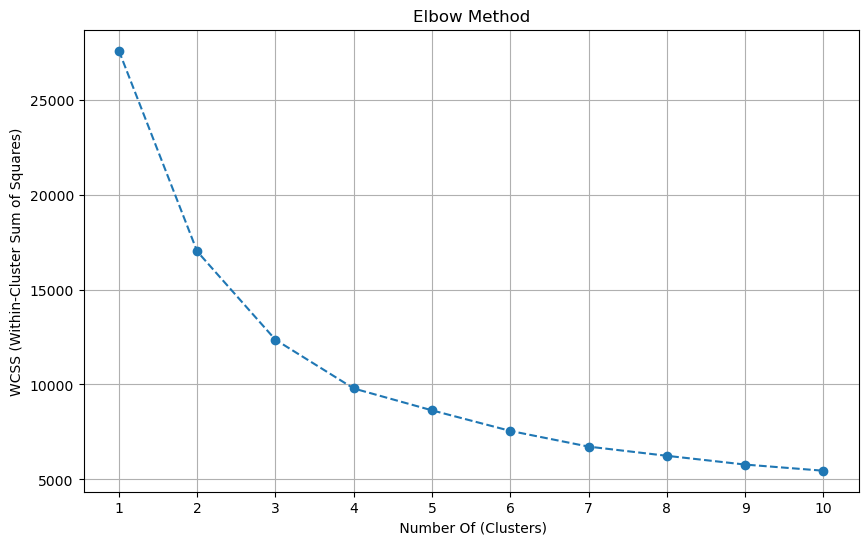

In [57]:
from sklearn.cluster import KMeans
# Elbow Method
wcss = []  # Within-Cluster Sum of Squares
cluster_range = range(1, 11)  

for i in cluster_range:
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(rfm_scaled)
    wcss.append(kmeans.inertia_)  # inertia_ = WCSS

# Figure 
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel(' Number Of (Clusters)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.xticks(cluster_range)
plt.grid()
plt.show()

In [58]:
from sklearn.cluster import KMeans
optimal_clusters = 4  
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
rfm_df['Cluster'] = kmeans.fit_predict(rfm_scaled)



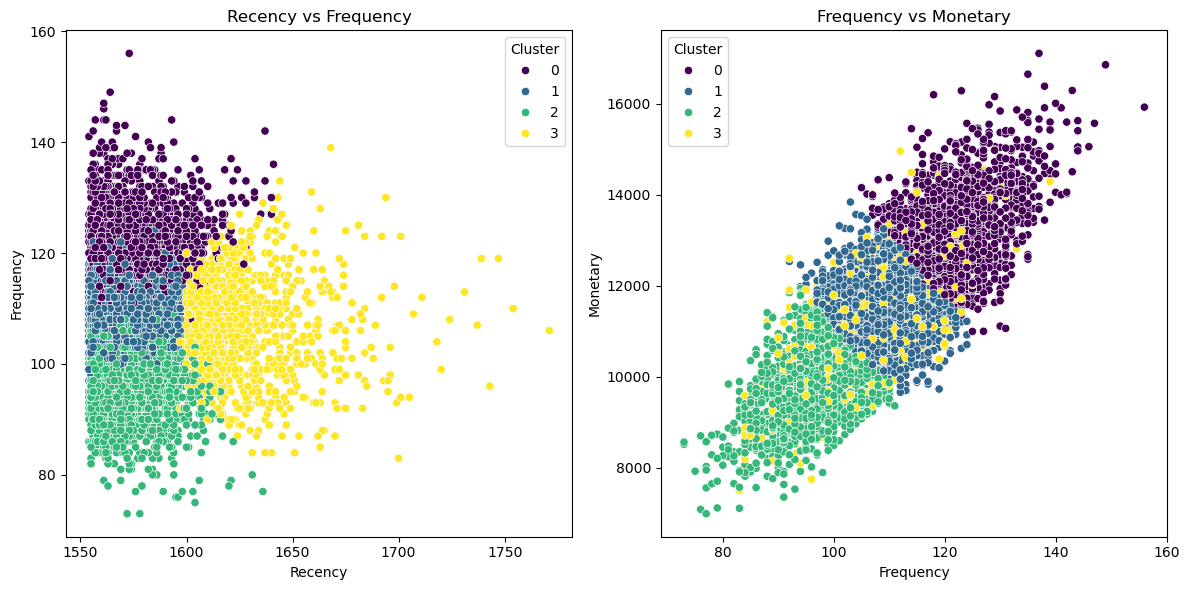

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

# Recency vs Frequency
plt.subplot(1, 2, 1)
sns.scatterplot(data=rfm_df, x='Recency', y='Frequency', hue='Cluster', palette='viridis')
plt.title('Recency vs Frequency')

# Frequency vs Monetary
plt.subplot(1, 2, 2)
sns.scatterplot(data=rfm_df, x='Frequency', y='Monetary', hue='Cluster', palette='viridis')
plt.title('Frequency vs Monetary')

plt.tight_layout()
plt.show()


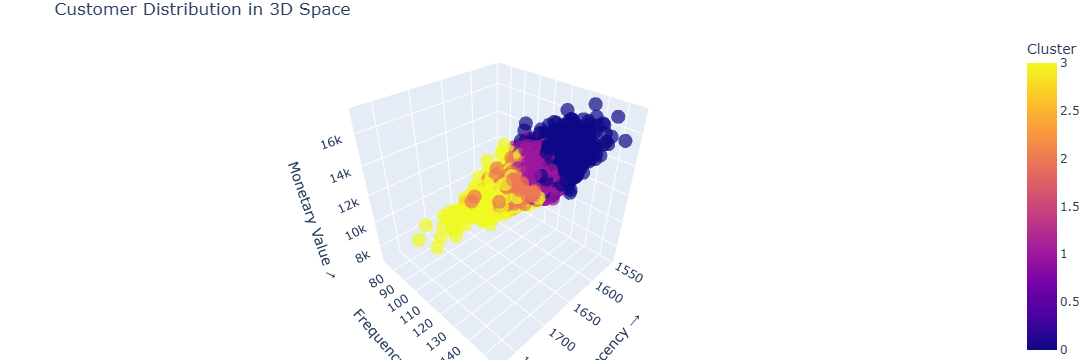

In [60]:
import plotly.express as px

fig = px.scatter_3d(
    rfm_df,
    x='Recency',
    y='Frequency',
    z='Monetary',
    color='Cluster',
    hover_name='coustomer_key',
    title='Customer Distribution in 3D Space',
    labels={
        'Recency': 'Recency (Days)',
        'Frequency': 'Frequency',
        'Monetary': 'Monetary Value ($)'
    },
    opacity=0.7,
    color_discrete_sequence=px.colors.qualitative.Plotly
)

fig.update_layout(
    scene=dict(
        xaxis_title='Recency →',
        yaxis_title='Frequency ↑',
        zaxis_title='Monetary Value ↗'
    ),
    margin=dict(l=0, r=0, b=0, t=30)
)

fig.show()


In [61]:
rfm_df_sorted = rfm_df.sort_values(by='Monetary', ascending=True)
rfm_df_sorted

,coustomer_key,Recency,Frequency,Monetary,Cluster
6401,C006402,1576,77,6986.50,2
4387,C004388,1595,76,7081.75,2
6016,C006017,1555,83,7105.50,2
3049,C003050,1606,79,7113.50,2
5058,C005059,1574,91,7351.25,2
...,...,...,...,...,...
7552,C007553,1567,143,16288.75,0
1437,C001438,1561,138,16381.50,0
272,C000273,1618,135,16645.75,0
5315,C005316,1564,149,16853.25,0
